**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Production economy and CO2 taxation](#toc1_)    
- 2. [Problem 2: Career choice model](#toc2_)    
- 3. [Problem 3: Barycentric interpolation](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
# Write your code here
import numpy as np
from types import SimpleNamespace
from Examproject import ProductionEconomy
model = ProductionEconomy

## 1. <a id='toc1_'></a>[Problem 1: Production economy and CO2 taxation](#toc0_)

Consider a production economy with two firms indexed by $j \in \{1,2\}$. Each produce its own good. They solve

$$
\begin{align*}
\max_{y_{j}}\pi_{j}&=p_{j}y_{j}-w_{j}\ell_{j}\\\text{s.t.}\;&y_{j}=A\ell_{j}^{\gamma}.
\end{align*}
$$

Optimal firm behavior is

$$
\begin{align*}
\ell_{j}^{\star}(w,p_{j})&=\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}} \\
y_{j}^{\star}(w,p_{j})&=A\left(\ell_{j}^{\star}(w,p_{j})\right)^{\gamma}
\end{align*}
$$

The implied profits are

$$
\pi_{j}^*(w,p_{j})=\frac{1-\gamma}{\gamma}w\cdot\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}}
$$

A single consumer supplies labor, and consumes the goods the firms produce. She also recieves the implied profits of the firm.<br>
She solves:

$$
\begin{align*}
U(p_1,p_2,w,\tau,T) = \max_{c_{1},c_{2},\ell} & \log(c_{1}^{\alpha}c_{2}^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} \\
\text{s.t.}\,\,\,&p_{1}c_{1}+(p_{2}+\tau)c_{2}=w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})
\end{align*}
$$

where $\tau$ is a tax and $T$ is lump-sum transfer. <br>
For a given $\ell$, it can be shown that optimal behavior is

$$
\begin{align*}
c_{1}(\ell)&=\alpha\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{1}} \\
c_{2}(\ell)&=(1-\alpha)\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{2}+\tau} \\
\end{align*}
$$
Such that optimal behavior is:
$$
\ell^* = \underset{\ell}{\arg\max} \log(\left(c_{1}(\ell)\right)^{\alpha}\cdot \left(c_{2}(\ell)\right)^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} 
$$
With optimal consumption:
$$
\begin{align*}
c_1^*=c_{1}(\ell^*) \\
c_2^*=c_{2}(\ell^*)\\
\end{align*}
$$


The government chooses $\tau$ and balances its budget so $T=\tau c_2^*$. We initially set $\tau,T=0$.

Market clearing requires:

1. Labor market: $\ell^* = \ell_1^* + \ell_2^*$
1. Good market 1: $c_1^* = y_1^*$
1. Good market 2: $c_2^* = y_2^*$


**Question 1:** Check market clearing conditions for $p_1$ in `linspace(0.1,2.0,10)` and $p_2$ in `linspace(0.1,2.0,10)`. We choose $w=1$ as numeraire.

In [2]:

# Initialize parameters
par = SimpleNamespace()

# firms
par.A = 1.0
par.gamma = 0.5

# households
par.alpha = 0.3
par.nu = 1.0
par.epsilon = 2.0

# government
par.tau = 0.0
par.T = 0.0

# Initialize the economy with parameters
model = ProductionEconomy(A=par.A, gamma=par.gamma, alpha=par.alpha, nu=par.nu, epsilon=par.epsilon)

# Setting parameters
w = 1  # Wage (numeraire)

# Function to check market clearing
def check_market_clearing(model, p1_values, p2_values, w, tau, T):
    results = []
    for p1 in p1_values:
        for p2 in p2_values:
            ell_opt = model.consumer_optimal_labor(p1, p2, w, tau, T)
            c1, c2, income = model.consumer_budget(p1, p2, w, tau, T, ell_opt)
            y1 = model.firm1_output_opt(w, p1)
            y2 = model.firm2_output_opt(w, p2)
            labor_demand_total = model.firm1_labor_demand(w, p1) + model.firm2_labor_demand(w, p2)
            labor_market_clear = np.isclose(ell_opt, labor_demand_total)
            goods_market1_clear = np.isclose(model.C1_star(p1, p2, w, tau, T), model.firm1_output_opt(w, p1)) 
            goods_market2_clear = np.isclose(model.C2_star(p1, p2, w, tau, T), model.firm2_output_opt(w, p2))
            results.append((p1, p2, labor_market_clear, goods_market1_clear, goods_market2_clear))
    return results

# Define the ranges for p1 and p2
p1_values = np.linspace(0.1, 2.0, 10)
p2_values = np.linspace(0.1, 2.0, 10)

# Check market clearing conditions
results = check_market_clearing(model, p1_values, p2_values, w, par.tau, par.T)

# Print the results
for result in results:
    p1, p2, labor_market_clear, goods_market1_clear, goods_market2_clear = result
    print(f"p1: {p1:.2f}, p2: {p2:.2f} - Labor Market Clear: {labor_market_clear}, Good1 Market Clear: {goods_market1_clear}, Good2 Market Clear: {goods_market2_clear}")


 

p1: 0.10, p2: 0.10 - Labor Market Clear: False, Good1 Market Clear: False, Good2 Market Clear: False
p1: 0.10, p2: 0.31 - Labor Market Clear: False, Good1 Market Clear: False, Good2 Market Clear: False
p1: 0.10, p2: 0.52 - Labor Market Clear: False, Good1 Market Clear: False, Good2 Market Clear: False
p1: 0.10, p2: 0.73 - Labor Market Clear: False, Good1 Market Clear: False, Good2 Market Clear: False
p1: 0.10, p2: 0.94 - Labor Market Clear: False, Good1 Market Clear: False, Good2 Market Clear: False
p1: 0.10, p2: 1.16 - Labor Market Clear: False, Good1 Market Clear: False, Good2 Market Clear: False
p1: 0.10, p2: 1.37 - Labor Market Clear: False, Good1 Market Clear: False, Good2 Market Clear: False
p1: 0.10, p2: 1.58 - Labor Market Clear: False, Good1 Market Clear: False, Good2 Market Clear: False
p1: 0.10, p2: 1.79 - Labor Market Clear: False, Good1 Market Clear: False, Good2 Market Clear: False
p1: 0.10, p2: 2.00 - Labor Market Clear: False, Good1 Market Clear: False, Good2 Market Cle

**Question 2:** Find the equilibrium prices $p_1$ and $p_2$.<br>
*Hint: you can use Walras' law to only check 2 of the market clearings*

In [3]:
from scipy.optimize import fsolve

# Function to solve for equilibrium prices
def market_clearing_equilibrium(p, model, w, tau, T):
    p1, p2 = p
    ell_opt = model.consumer_optimal_labor(p1, p2, w, tau, T)
    
    # Calculate market quantities
    labor_demand_total = model.firm1_labor_demand(w, p1) + model.firm2_labor_demand(w, p2)
    y1 = model.firm1_output_opt(w, p1)
    c1 = model.C1_star(p1, p2, w, tau, T)
    
    # Equilibrium conditions (2 out of 3 due to Walras' Law)
    labor_market_clearing = ell_opt - labor_demand_total
    goods_market1_clearing = c1 - y1
    
    return [labor_market_clearing, goods_market1_clearing]

# Initial guess for p1 and p2
initial_guess = [1.0, 1.0]

# Solve for equilibrium prices
equilibrium_prices = fsolve(market_clearing_equilibrium, initial_guess, args=(model, w, par.tau, par.T))

# Extract equilibrium prices
p1_star, p2_star = equilibrium_prices

# Print the equilibrium prices
print(f"Equilibrium prices: p1* = {p1_star:.4f}, p2* = {p2_star:.4f}")


Equilibrium prices: p1* = 0.9741, p2* = 1.4880


Assume the government care about the social welfare function:

$$
SWF = U - \kappa y_2^*
$$

Here $\kappa$ measures the social cost of carbon emitted by the production of $y_2$ in equilibrium.

**Question 3:** What values of $\tau$ and (implied) $T$ should the government choose to maximize $SWF$?

In [4]:

# Instantiate the ProductionEconomy class
economy = ProductionEconomy()

# Define the range for τ, p1, and p2
tau_values = np.linspace(0.1, 2.0, 10)
p1_values = np.linspace(0.5, 2.0, 10)
p2_values = np.linspace(0.5, 2.0, 10)

# Initialize variables to store the results
optimal_tau = 0
optimal_p1 = 0
optimal_p2 = 0
max_swf = -np.inf

# Nested loops to find the optimal τ, p1, and p2
for p1 in p1_values:
    for p2 in p2_values:
        for tau in tau_values:
            swf = economy.SWF_function(p1=p1, p2=p2, w=1, tau=tau, kappa=economy.kappa)
            
            # Check if this is the best SWF so far
            if swf > max_swf:
                max_swf = swf
                optimal_tau = tau
                optimal_p1 = p1
                optimal_p2 = p2

# Calculate T using the optimal τ, p1, and p2
optimal_T = economy.calculate_T(p1=optimal_p1, p2=optimal_p2, w=1, tau=optimal_tau)

# Display results
print("Optimal tau:", optimal_tau)
print("Optimal p1:", optimal_p1)
print("Optimal p2:", optimal_p2)
print("Optimal T:", optimal_T)
print("Max SWF:", max_swf)



Optimal tau: 0.1
Optimal p1: 2.0
Optimal p2: 0.5
Optimal T: 0.21037808641975309
Max SWF: 0.07901491360042659


In [20]:
import numpy as np
from scipy.optimize import fsolve

class ProductionEconomy:
    def __init__(self, A=1.0, gamma=0.5, alpha=0.3, nu=1.0, epsilon=2.0, kappa=0.1):
        self.A = A
        self.gamma = gamma
        self.alpha = alpha
        self.nu = nu
        self.epsilon = epsilon
        self.kappa = kappa

    def firm_labor_demand(self, w, pj):
        return ((self.gamma * self.A * pj) / w) ** (1 / (1 - self.gamma))

    def firm_output(self, w, pj):
        return self.A * self.firm_labor_demand(w, pj) ** self.gamma

    def firm_profit(self, w, pj):
        return ((1 - self.gamma) / self.gamma) * w * self.firm_labor_demand(w, pj)

    def consumer_utility(self, c1, c2, ell):
        return np.log(c1 ** self.alpha * c2 ** (1 - self.alpha)) - self.nu * ell ** (1 + self.epsilon) / (1 + self.epsilon)

    def consumer_budget(self, p1, p2, w, tau, T, ell):
        pi1 = self.firm_profit(w, p1)
        pi2 = self.firm_profit(w, p2)
        income = w * ell + T + pi1 + pi2
        c1 = self.alpha * income / p1
        c2 = (1 - self.alpha) * income / (p2 + tau)
        return c1, c2, income

    def consumer_optimal_labor(self, p1, p2, w, tau, T):
        income = lambda ell: w * ell + T + self.firm_profit(w, p1) + self.firm_profit(w, p2)
        utility = lambda ell: np.log((self.alpha * income(ell) / p1) ** self.alpha * 
                                     ((1 - self.alpha) * income(ell) / (p2 + tau)) ** (1 - self.alpha)) - \
                              self.nu * ell ** (1 + self.epsilon) / (1 + self.epsilon)
        return max((utility(ell), ell) for ell in np.linspace(0, 10, 1000))[1]

    def market_clearing(self, prices):
        p1, p2 = prices
        w = 1  # Wage as numeraire
        ell = self.consumer_optimal_labor(p1, p2, w, 0, 0)
        c1, c2, _ = self.consumer_budget(p1, p2, w, 0, 0, ell)
        y1 = self.firm_output(w, p1)
        y2 = self.firm_output(w, p2)
        return [c1 - y1, c2 - y2]

    def C2_star(self, p1, p2, w, tau, T):
        ell_star = self.consumer_optimal_labor(p1, p2, w, tau, T)
        _, c2, _ = self.consumer_budget(p1, p2, w, tau, T, ell_star)
        return c2

    def calculate_T(self, p1, p2, w, tau):
        c2_star = self.C2_star(p1, p2, w, tau, tau * 0)  # T is initially 0
        return tau * c2_star

    def SWF_function(self, p1, p2, w, tau):
        T = self.calculate_T(p1, p2, w, tau)
        ell_opt = self.consumer_optimal_labor(p1, p2, w, tau, T)
        c1, c2, _ = self.consumer_budget(p1, p2, w, tau, T, ell_opt)
        consumer_utility = self.consumer_utility(c1, c2, ell_opt)
        firm_output_p2 = self.firm_output(w, p2)
        return consumer_utility - self.kappa * firm_output_p2

# Instantiate the ProductionEconomy class
economy = ProductionEconomy()

# Solve for equilibrium prices
initial_guess = [1, 1]
equilibrium_prices = fsolve(economy.market_clearing, initial_guess)
p1_eq, p2_eq = equilibrium_prices
print(f"Equilibrium prices without tax: p1 = {p1_eq}, p2 = {p2_eq}")


Equilibrium prices without tax: p1 = 0.9741401074531036, p2 = 1.4880235932987582


In [21]:
# Define the range for τ
tau_values = np.linspace(0.1, 2.0, 10)

# Initialize variables to store the results
optimal_tau = 0
max_swf = -np.inf

# Loop over τ values to find the optimal τ
for tau in tau_values:
    swf = economy.SWF_function(p1=p1_eq, p2=p2_eq, w=1, tau=tau)
    
    # Check if this is the best SWF so far
    if swf > max_swf:
        max_swf = swf
        optimal_tau = tau

# Calculate T using the optimal τ
optimal_T = economy.calculate_T(p1=p1_eq, p2=p2_eq, w=1, tau=optimal_tau)

# Display results
print("Optimal tau:", optimal_tau)
print("Optimal T:", optimal_T)
print("Max SWF:", max_swf)


Optimal tau: 0.1
Optimal T: 0.06971603644799924
Max SWF: -0.6643270362915538


In [23]:
# Define ranges for p1, p2, and τ
p1_values = np.linspace(0.5, 2.0, 10)
p2_values = np.linspace(0.5, 2.0, 10)
tau_values = np.linspace(0.1, 2.0, 10)

# Initialize variables to store the results
optimal_tau = 0
optimal_p1 = 0
optimal_p2 = 0
max_swf = -np.inf

# Nested loops to find the optimal τ, p1, and p2
for p1 in p1_values:
    for p2 in p2_values:
        for tau in tau_values:
            swf = economy.SWF_function(p1=p1, p2=p2, w=1, tau=tau)
            
            # Check if this is the best SWF so far
            if swf > max_swf:
                max_swf = swf
                optimal_tau = tau
                optimal_p1 = p1
                optimal_p2 = p2

# Calculate T using the optimal τ, p1, and p2
optimal_T = economy.calculate_T(p1=optimal_p1, p2=optimal_p2, w=1, tau=optimal_tau)

# Display results
print("Optimal tau:", optimal_tau)
print("Optimal p1:", optimal_p1)
print("Optimal p2:", optimal_p2)
print("Optimal T:", optimal_T)
print("Max SWF:", max_swf)


Optimal tau: 0.1
Optimal p1: 2.0
Optimal p2: 0.5
Optimal T: 0.21037808641975309
Max SWF: 0.07901491360042659


## 2. <a id='toc2_'></a>[Problem 2: Career choice model](#toc0_)

Consider a graduate $i$ making a choice between entering $J$ different career tracks. <br>
Entering career $j$ yields utility $u^k_{ij}$. This value is unknown to the graduate ex ante, but will ex post be: <br>
$$
    u_{i,j}^k = v_{j} + \epsilon_{i,j}^k
$$

They know that $\epsilon^k_{i,j}\sim \mathcal{N}(0,\sigma^2)$, but they do not observe $\epsilon^k_{i,j}$ before making their career choice. <br>

Consider the concrete case of $J=3$ with:
$$
\begin{align*}
    v_{1} &= 1 \\
    v_{2} &= 2 \\
    v_{3} &= 3
\end{align*}
$$

If the graduates know the values of $v_j$ and the distribution of $\epsilon_{i,j}^k$, they can calculate the expected utility of each career track using simulation: <br>
$$
    \mathbb{E}\left[ u^k_{i,j}\vert v_j \right] \approx v_j + \frac{1}{K}\sum_{k=1}^K \epsilon_{i,j}^k
$$

In [5]:
par = SimpleNamespace()
par.J = 3
par.N = 10
par.K = 10000

par.F = np.arange(1,par.N+1)
par.sigma = 2

par.v = np.array([1,2,3])
par.c = 1

**Question 1:** Simulate and calculate expected utility and the average realised utility for $K=10000$ draws, for each career choice $j$.


In [6]:
import numpy as np
from types import SimpleNamespace

# Define parameters
par = SimpleNamespace()
par.J = 3
par.K = 10000
par.v = np.array([1, 2, 3])
par.sigma = 2

# Simulate the utility draws
epsilon = np.random.normal(0, par.sigma, (par.K, par.J))
utility = par.v + epsilon

# Calculate expected utility and average realized utility
expected_utility = np.mean(utility, axis=0)
average_realized_utility = np.mean(utility, axis=0)

# Output results in a readable format
for j in range(par.J):
    print(f"Career path {j+1}:")
    print(f"  Expected utility: {expected_utility[j]}")
    print(f"  Average realized utility: {average_realized_utility[j]}")




Career path 1:
  Expected utility: 0.976141051067632
  Average realized utility: 0.976141051067632
Career path 2:
  Expected utility: 2.0004121153422343
  Average realized utility: 2.0004121153422343
Career path 3:
  Expected utility: 2.981573498183971
  Average realized utility: 2.981573498183971


Now consider a new scenario: Imagine that the graduate does not know $v_j$. The *only* prior information they have on the value of each job, comes from their $F_{i}$ friends that work in each career $j$. After talking with them, they know the average utility of their friends (which includes their friends' noise term), giving them the prior expecation: <br>
$$
\tilde{u}^k_{i,j}\left( F_{i}\right) = \frac{1}{F_{i}}\sum_{f=1}^{F_{i}} \left(v_{j} + \epsilon^k_{f,j}\right), \; \epsilon^k_{f,j}\sim \mathcal{N}(0,\sigma^2)
$$
For ease of notation consider that each graduate have $F_{i}=i$ friends in each career. <br>

For $K$ times do the following: <br>
1. For each person $i$ draw $J\cdot F_i$ values of $\epsilon_{f,j}^{k}$, and calculate the prior expected utility of each career track, $\tilde{u}^k_{i,j}\left( F_{i}\right)$. <br>
Also draw their own $J$ noise terms, $\epsilon_{i,j}^k$
1. Each person $i$ chooses the career track with the highest expected utility: $$j_i^{k*}= \arg\max_{j\in{1,2\dots,J}}\left\{ \tilde{u}^k_{i,j}\left( F_{i}\right)\right\} $$
1. Store the chosen careers: $j_i^{k*}$, the prior expectation of the value of their chosen career: $\tilde{u}^k_{i,j=j_i^{k*}}\left( F_{i}\right)$, and the realized value of their chosen career track: $u^k_{i,j=j_i^{k*}}=v_{j=j_i^{k*}}+\epsilon_{i,j=j_i^{k*}}^k$.

Chosen values will be: <br>
$i\in\left\{1,2\dots,N\right\}, N=10$ <br>
$F_i = i$<br>
So there are 10 graduates. The first has 1 friend in each career, the second has 2 friends, ... the tenth has 10 friends.

**Question 2:** Simulate and visualize: For each type of graduate, $i$, the share of graduates choosing each career, the average subjective expected utility of the graduates, and the average ex post realized utility given their choice. <br>
That is, calculate and visualize: <br>
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \mathbb{I}\left\{ j=j_i^{k*} \right\}  \;\forall j\in\left\{1,2,\dots,J\right\}
\end{align*}
$$
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \tilde{u}^k_{ij=j_i^{k*}}\left( F_{i}\right)
\end{align*}
$$
And 
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} u^k_{ij=j_i^{k*}} 
\end{align*}
$$
For each graduate $i$.

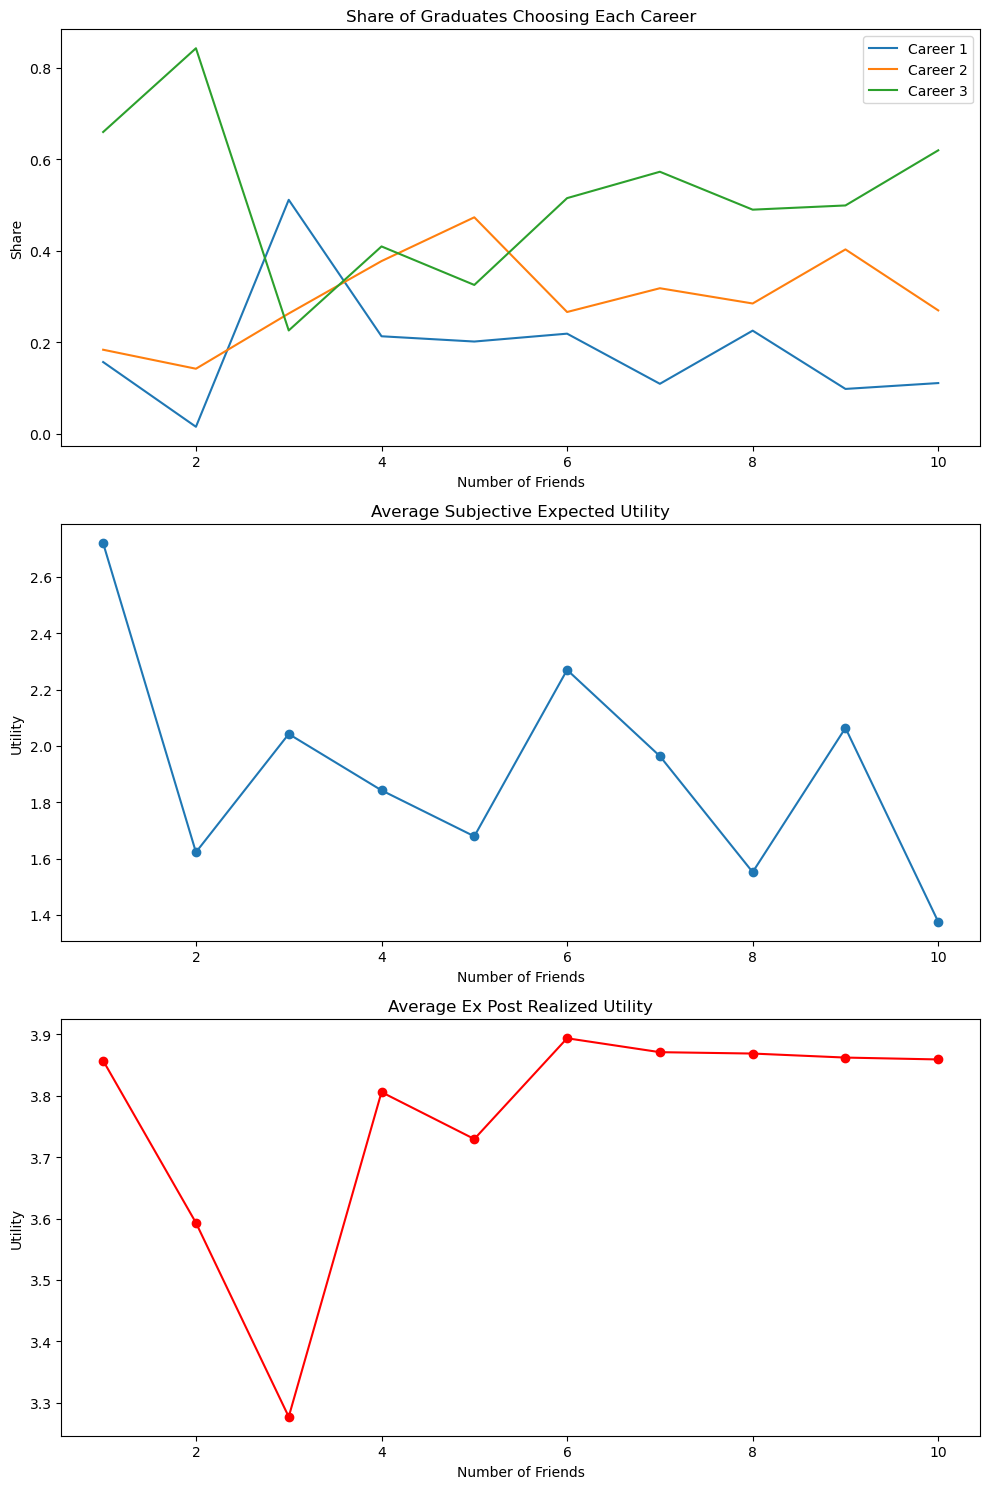

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
par = SimpleNamespace()
par.J = 3
par.N = 10
par.K = 10000
par.F = np.arange(1, par.N + 1)
par.sigma = 2
par.v = np.array([1, 2, 3])
par.c = 1

# Function to simulate career choice
def simulate_career_choices(par):
    career_choices = np.zeros((par.N, par.K, par.J))
    prior_expectations = np.zeros((par.N, par.J))
    realized_utilities = np.zeros((par.N, par.K))
    
    for i in range(par.N):
        F_i = par.F[i]
        epsilon_friends = np.random.normal(0, par.sigma, (F_i, par.J))
        epsilon_own = np.random.normal(0, par.sigma, (par.K, par.J))
        
        prior_expectation = par.v + np.mean(epsilon_friends, axis=0)
        prior_expectations[i, :] = prior_expectation
        
        utility_own = par.v + epsilon_own
        for k in range(par.K):
            chosen_career = np.argmax(prior_expectation + epsilon_own[k, :])
            career_choices[i, k, chosen_career] = 1
            realized_utilities[i, k] = utility_own[k, chosen_career]
    
    return career_choices, prior_expectations, realized_utilities

# Simulate the career choices
career_choices, prior_expectations, realized_utilities = simulate_career_choices(par)

# Calculate the share of graduates choosing each career
share_of_choices = np.mean(career_choices, axis=1)

# Calculate the average subjective expected utility
average_subjective_utility = np.mean(prior_expectations, axis=1)

# Calculate the average ex post realized utility
average_realized_utility = np.mean(realized_utilities, axis=1)

# Visualization
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Share of graduates choosing each career
for j in range(par.J):
    axs[0].plot(par.F, share_of_choices[:, j], label=f'Career {j+1}')
axs[0].set_title('Share of Graduates Choosing Each Career')
axs[0].set_xlabel('Number of Friends')
axs[0].set_ylabel('Share')
axs[0].legend()

# Average subjective expected utility
axs[1].plot(par.F, average_subjective_utility, marker='o')
axs[1].set_title('Average Subjective Expected Utility')
axs[1].set_xlabel('Number of Friends')
axs[1].set_ylabel('Utility')

# Average ex post realized utility
axs[2].plot(par.F, average_realized_utility, marker='o', color='r')
axs[2].set_title('Average Ex Post Realized Utility')
axs[2].set_xlabel('Number of Friends')
axs[2].set_ylabel('Utility')

plt.tight_layout()
plt.show()

After a year of working in their career, the graduates learn $u^k_{ij}$ for their chosen job $j_i^{k*}$ perfectly. <br>
The can switch to one of the two remaining careers, for which they have the same prior as before, but it will now include a switching cost of $c$ which is known.
Their new priors can be written as: 
$$
\tilde{u}^{k,2}_{ij}\left( F_{i}\right) = \begin{cases}
            \tilde{u}^k_{ij}\left( F_{i}\right)-c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

We will set $c=1$.

Their realized utility will be: <br>
$$
u^{k,2}_{ij}= \begin{cases}
            u_{ij}^k -c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

**Question 3:** Following the same approach as in question 2, find the new optimal career choice for each $i$, $k$. Then for each $i$, calculate the average subjective expected utility from their new optimal career choice, and the ex post realized utility of that career. Also, for each $i$, calculate the share of graduates that chooses to switch careers, conditional on which career they chose in the first year. <br>

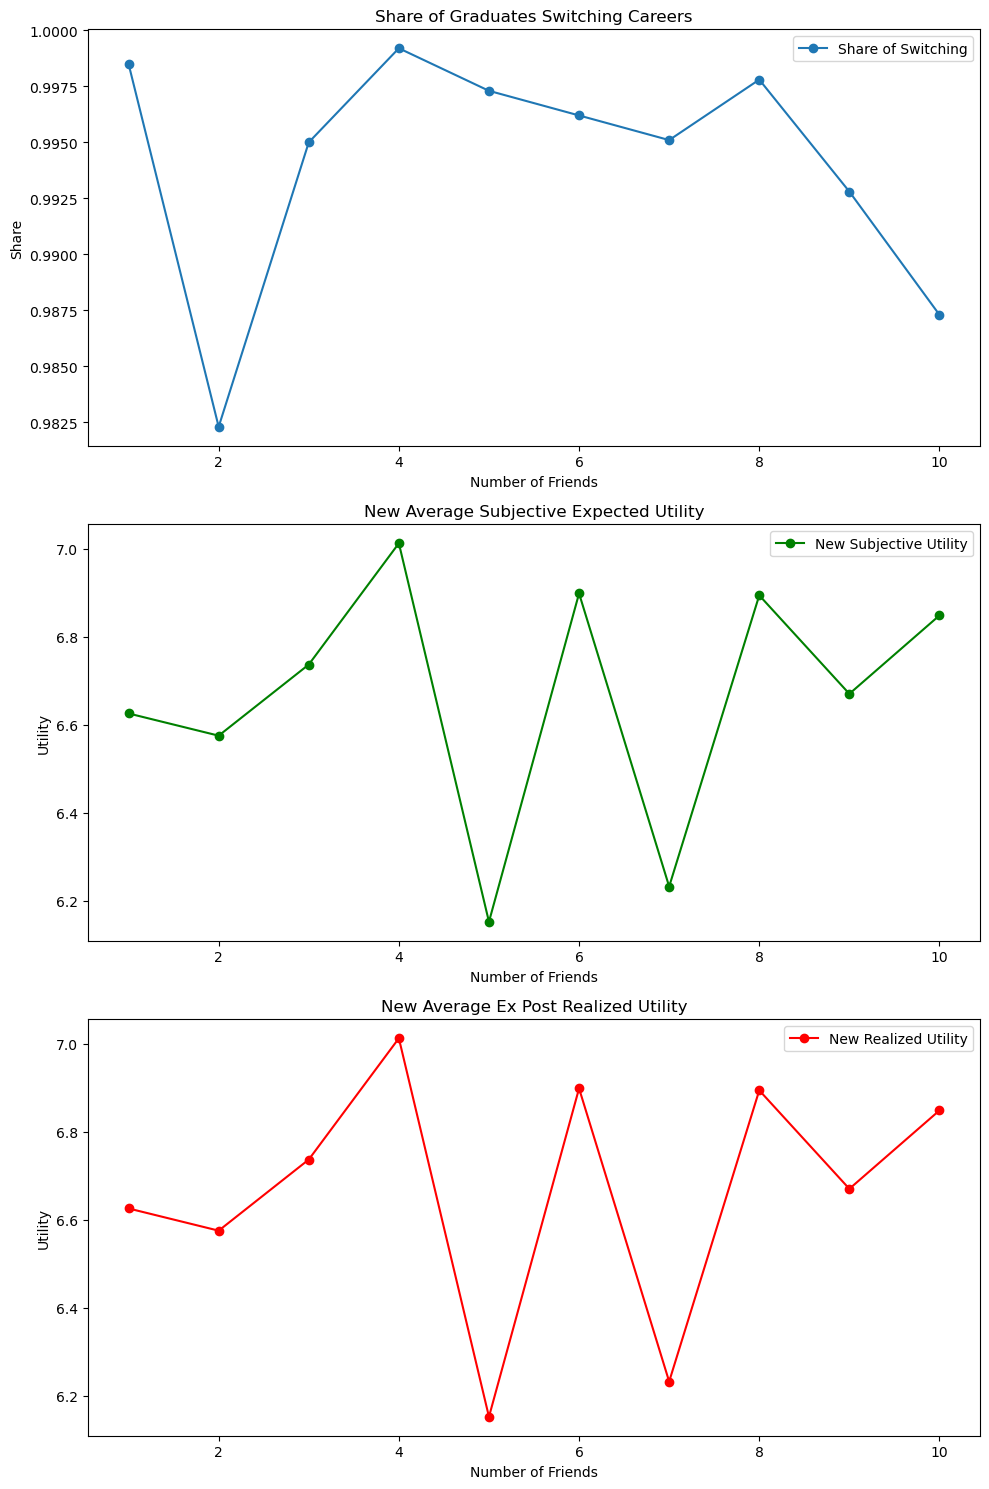

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
par = SimpleNamespace()
par.J = 3
par.N = 10
par.K = 10000
par.F = np.arange(1, par.N + 1)
par.sigma = 2
par.v = np.array([1, 2, 3])
par.c = 1

# Function to simulate career choice and switching
def simulate_career_choices_and_switching(par):
    career_choices = np.zeros((par.N, par.K, par.J))
    prior_expectations = np.zeros((par.N, par.J))
    realized_utilities = np.zeros((par.N, par.K))
    new_realized_utilities = np.zeros((par.N, par.K))
    switched_career = np.zeros((par.N, par.K), dtype=bool)
    
    for i in range(par.N):
        F_i = par.F[i]
        epsilon_friends = np.random.normal(0, par.sigma, (F_i, par.J))
        epsilon_own = np.random.normal(0, par.sigma, (par.K, par.J))
        
        prior_expectation = par.v + np.mean(epsilon_friends, axis=0)
        prior_expectations[i, :] = prior_expectation
        
        utility_own = par.v + epsilon_own
        for k in range(par.K):
            # Initial career choice
            chosen_career = np.argmax(prior_expectation + epsilon_own[k, :])
            career_choices[i, k, chosen_career] = 1
            realized_utilities[i, k] = utility_own[k, chosen_career]
            
            # After one year, decide to switch or stay
            new_prior_expectation = np.copy(prior_expectation)
            new_prior_expectation[chosen_career] = realized_utilities[i, k]
            new_utility_own = par.v + epsilon_own[k, :]
            
            best_alternative_utility = np.max(new_prior_expectation + new_utility_own - par.c)
            current_utility = realized_utilities[i, k]
            
            if best_alternative_utility > current_utility:
                switched_career[i, k] = True
                new_realized_utilities[i, k] = best_alternative_utility
            else:
                new_realized_utilities[i, k] = current_utility
    
    return career_choices, prior_expectations, realized_utilities, new_realized_utilities, switched_career

# Simulate the career choices and switching decisions
career_choices, prior_expectations, realized_utilities, new_realized_utilities, switched_career = simulate_career_choices_and_switching(par)

# Calculate the share of graduates switching careers
share_of_switching = np.mean(switched_career, axis=1)

# Calculate the new average subjective expected utility
new_average_subjective_utility = np.mean(new_realized_utilities, axis=1)

# Calculate the new average ex post realized utility
new_average_realized_utility = np.mean(new_realized_utilities, axis=1)

# Visualization
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Share of graduates switching careers
axs[0].plot(par.F, share_of_switching, marker='o', label='Share of Switching')
axs[0].set_title('Share of Graduates Switching Careers')
axs[0].set_xlabel('Number of Friends')
axs[0].set_ylabel('Share')
axs[0].legend()

# New average subjective expected utility
axs[1].plot(par.F, new_average_subjective_utility, marker='o', color='g', label='New Subjective Utility')
axs[1].set_title('New Average Subjective Expected Utility')
axs[1].set_xlabel('Number of Friends')
axs[1].set_ylabel('Utility')
axs[1].legend()

# New average ex post realized utility
axs[2].plot(par.F, new_average_realized_utility, marker='o', color='r', label='New Realized Utility')
axs[2].set_title('New Average Ex Post Realized Utility')
axs[2].set_xlabel('Number of Friends')
axs[2].set_ylabel('Utility')
axs[2].legend()

plt.tight_layout()
plt.show()



## 3. <a id='toc3_'></a>[Problem 3: Barycentric interpolation](#toc0_)

**Problem:** We have a set of random points in the unit square,

$$
\mathcal{X} = \{(x_1,x_2)\,|\,x_1\sim\mathcal{U}(0,1),x_2\sim\mathcal{U}(0,1)\}.
$$

For these points, we know the value of some function $f(x_1,x_2)$,

$$
\mathcal{F} = \{f(x_1,x_2) \,|\, (x_1,x_2) \in \mathcal{X}\}.
$$

Now we want to approximate the value $f(y_1,y_2)$ for some  $y=(y_1,y_2)$, where $y_1\sim\mathcal{U}(0,1)$ and $y_2\sim\mathcal{U}(0,1)$.

**Building block I**

For an arbitrary triangle $ABC$ and a point $y$, define the so-called barycentric coordinates as:

$$
\begin{align*}
  r^{ABC}_1 &= \frac{(B_2-C_2)(y_1-C_1) + (C_1-B_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_2 &= \frac{(C_2-A_2)(y_1-C_1) + (A_1-C_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_3 &= 1 - r_1 - r_2.
\end{align*}
$$

If $r^{ABC}_1 \in [0,1]$, $r^{ABC}_2 \in [0,1]$, and $r^{ABC}_3 \in [0,1]$, then the point is inside the triangle.

We always have $y = r^{ABC}_1 A + r^{ABC}_2 B + r^{ABC}_3 C$.

**Building block II**

Define the following points:

$$
\begin{align*}
A&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}>y_{2}\\
B&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}<y_{2}\\
C&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}<y_{2}\\
D&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}>y_{2}.
\end{align*}
$$

**Algorithm:**

1. Compute $A$, $B$, $C$, and $D$. If not possible return `NaN`.
1. If $y$ is inside the triangle $ABC$ return $r^{ABC}_1 f(A) + r^{ABC}_2 f(B) + r^{ABC}_3 f(C)$.
1. If $y$ is inside the triangle $CDA$ return $r^{CDA}_1 f(C) + r^{CDA}_2 f(D) + r^{CDA}_3 f(A)$.
1. Return `NaN`.



**Sample:**

In [9]:
rng = np.random.default_rng(2024)

X = rng.uniform(size=(50,2))
y = rng.uniform(size=(2,))


**Questions 1:** Find $A$, $B$, $C$ and $D$. Illustrate these together with $X$, $y$ and the triangles $ABC$ and $CDA$.

In [10]:
# write your answer here

**Question 2:** Compute the barycentric coordinates of the point $y$ with respect to the triangles $ABC$ and $CDA$. Which triangle is $y$ located inside?

In [11]:
# write your answer here

Now consider the function:
$$
f(x_1,x_2) = x_1 \cdot x_2
$$

In [12]:
f = lambda x: x[0]*x[1]
F = np.array([f(x) for x in X])

**Question 3:** Compute the approximation of $f(y)$ using the full algorithm. Compare with the true value.

In [13]:
# write your answer here

**Question 4:** Repeat question 3 for all points in the set $Y$.

In [14]:
Y = [(0.2,0.2),(0.8,0.2),(0.8,0.8),(0.8,0.2),(0.5,0.5)]

In [15]:
# write your answer here